In [1]:
# European charging stations
# Simple linear regression model to forecast
# installations of EV charging states for
# GJO tournament question:
# https://www.gjopen.com/questions/1059-on-10-december-2019-how-many-total-locations-with-combined-charging-system-ccs-fast-chargers-will-be-installed-in-the-european-area
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ~~~
# Load data and fit model
# ~~~

# Data from Wayback Machine used with http://ccs-map.eu/stats/

data = pd.Series([133, 	121, 	64,	107, 	98, 	68, 50, 	38,	62, 	115, 	58, 	85,66, 86, 	82, 	108, 	94,	73, 	61, 78][::-1], index = pd.period_range(start = '2016-2-1', end = '2017-9-1', freq='M'))

data = data.append(pd.Series([151, 	249, 	124, 	176, 	100, 	233][::-1], index = pd.period_range(start = '2017-10-1', end = '2018-3-1', freq='M')))

data = data.append(pd.Series([159, 	148, 	191, 	115, 	166, 	121, 	75][::-1], index = pd.period_range(start = '2018-4-1', end = '2018-10-1', freq='M')))

data = data.append(pd.Series([162, 172, 	144, 	346, 	393, 	160 ,	269 ,	210][::-1], index = pd.period_range(start = '2018-11-1', end = '2019-6-1', freq='M')))

# ~~~
# Fit model
# ~~~

x = np.arange(len(data.index))
ols = sm.regression.linear_model.OLS(endog = data.values, exog = sm.add_constant(x)).fit()

print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     33.76
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           9.49e-07
Time:                        16:54:18   Log-Likelihood:                -223.23
No. Observations:                  41   AIC:                             450.5
Df Residuals:                      39   BIC:                             453.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3206     17.615      2.630      0.0

In [2]:
# ~~~
# Generation future predictions
# ~~~

future_x = np.arange(41,47)
all_x = np.arange(0,47)
total_range = pd.period_range(start = '2016-2-1', end = '2019-12-1', freq='M')
results_range = pd.period_range(start = '2019-7-1', end = '2019-12-1', freq='M')

predictions = ols.get_prediction(exog = sm.add_constant(all_x))

central = pd.Series(predictions.summary_frame(alpha=0.05)['mean'].values, index = total_range)
low = pd.Series(predictions.summary_frame(alpha=0.05)['obs_ci_lower'].values, index = total_range)
high = pd.Series(predictions.summary_frame(alpha=0.05)['obs_ci_upper'].values, index = total_range)

print(central[-6:]) # print forecasted values from July onward


2019-07    226.913415
2019-08    231.318118
2019-09    235.722822
2019-10    240.127526
2019-11    244.532230
2019-12    248.936934
Freq: M, dtype: float64


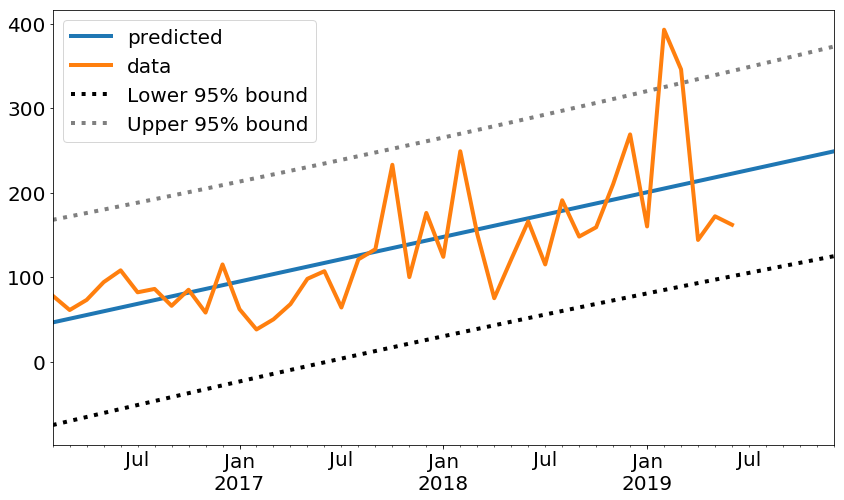

In [3]:
# ~~~
# Plot
# ~~~

ax = central.plot(figsize = (14,8), fontsize = 20, lw=4, label = "predicted")
ax.plot(data, lw = 4, label = "data")
ax.plot(low, lw=4, linestyle = "dotted", color = 'black', label = "Lower 95% bound")
ax.plot(high, lw=4, linestyle = "dotted", color = 'grey', label = "Upper 95% bound")
lg = ax.legend(fontsize = 20, loc ='upper left')